#**Osservazioni sulle vendite settimanali di prodotti dei settori Calcio, Pesca e Casual**



In [1]:
#https://github.com/TommasoStrada/Progetto-Data-Science-Lab

The XGBoost (eXtreme Gradient Boosting) is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm that attempts to accurately predict a target variable by combining an ensemble of estimates from a set of simpler and weaker models. The XGBoost algorithm performs well in machine learning competitions because of its robust handling of a variety of data types, relationships, distributions, and the variety of hyperparameters that you can fine-tune. You can use XGBoost for regression, classification (binary and multiclass), and ranking problems.

In [2]:
#!pip install xgboost 1.6

In [3]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost

In [4]:
shift_settimanale = 1
shift_mensile = 4        #stessa settimana circa mese precedente
shift_annuale = 52       #stesso settimana, circa anno precedente
shift_scelto = shift_annuale

In [5]:
repo_alessandro_calcio = "https://github.com/Alessandro-Fasani/DsLab/raw/main/calcio_settimanale.csv"
repo_alessandro_pesca = "https://github.com/Alessandro-Fasani/DsLab/raw/main/pesca_settimanale.csv"
repo_alessandro_casual = "https://github.com/Alessandro-Fasani/DsLab/raw/main/casual_settimanale.csv"

repo_team_calcio = ""
repo_team_pesca = ""
repo_team_casual = ""

In [6]:
ds_calcio = pd.read_csv(repo_alessandro_calcio)
ds_pesca = pd.read_csv(repo_alessandro_pesca)
ds_casual = pd.read_csv(repo_alessandro_casual)

In [7]:
porzione_test = round(len(ds_calcio) * 0.2)       # 20% circa verra usato per il test 

ds_casual.head(50)

,Unnamed: 0,year,revenue
0,0,2014-01-05,0.00
1,1,2014-01-12,0.00
2,2,2014-01-19,4762.11
3,3,2014-01-26,0.00
4,4,2014-02-02,2101.33
5,5,2014-02-09,46674.08
6,6,2014-02-16,42611.42
7,7,2014-02-23,13720.59
8,8,2014-03-02,53897.75
9,9,2014-03-09,85035.92


In [8]:
ds_calcio['year'] = pd.to_datetime(ds_calcio['year'])
ds_pesca['year'] = pd.to_datetime(ds_pesca['year'])
ds_casual['year'] = pd.to_datetime(ds_casual['year'])
ds_calcio.dtypes

Unnamed: 0             int64
year          datetime64[ns]
revenue              float64
dtype: object

In [9]:
print("xgboost versione numero: ", xgboost.__version__)

xgboost versione numero:  0.90


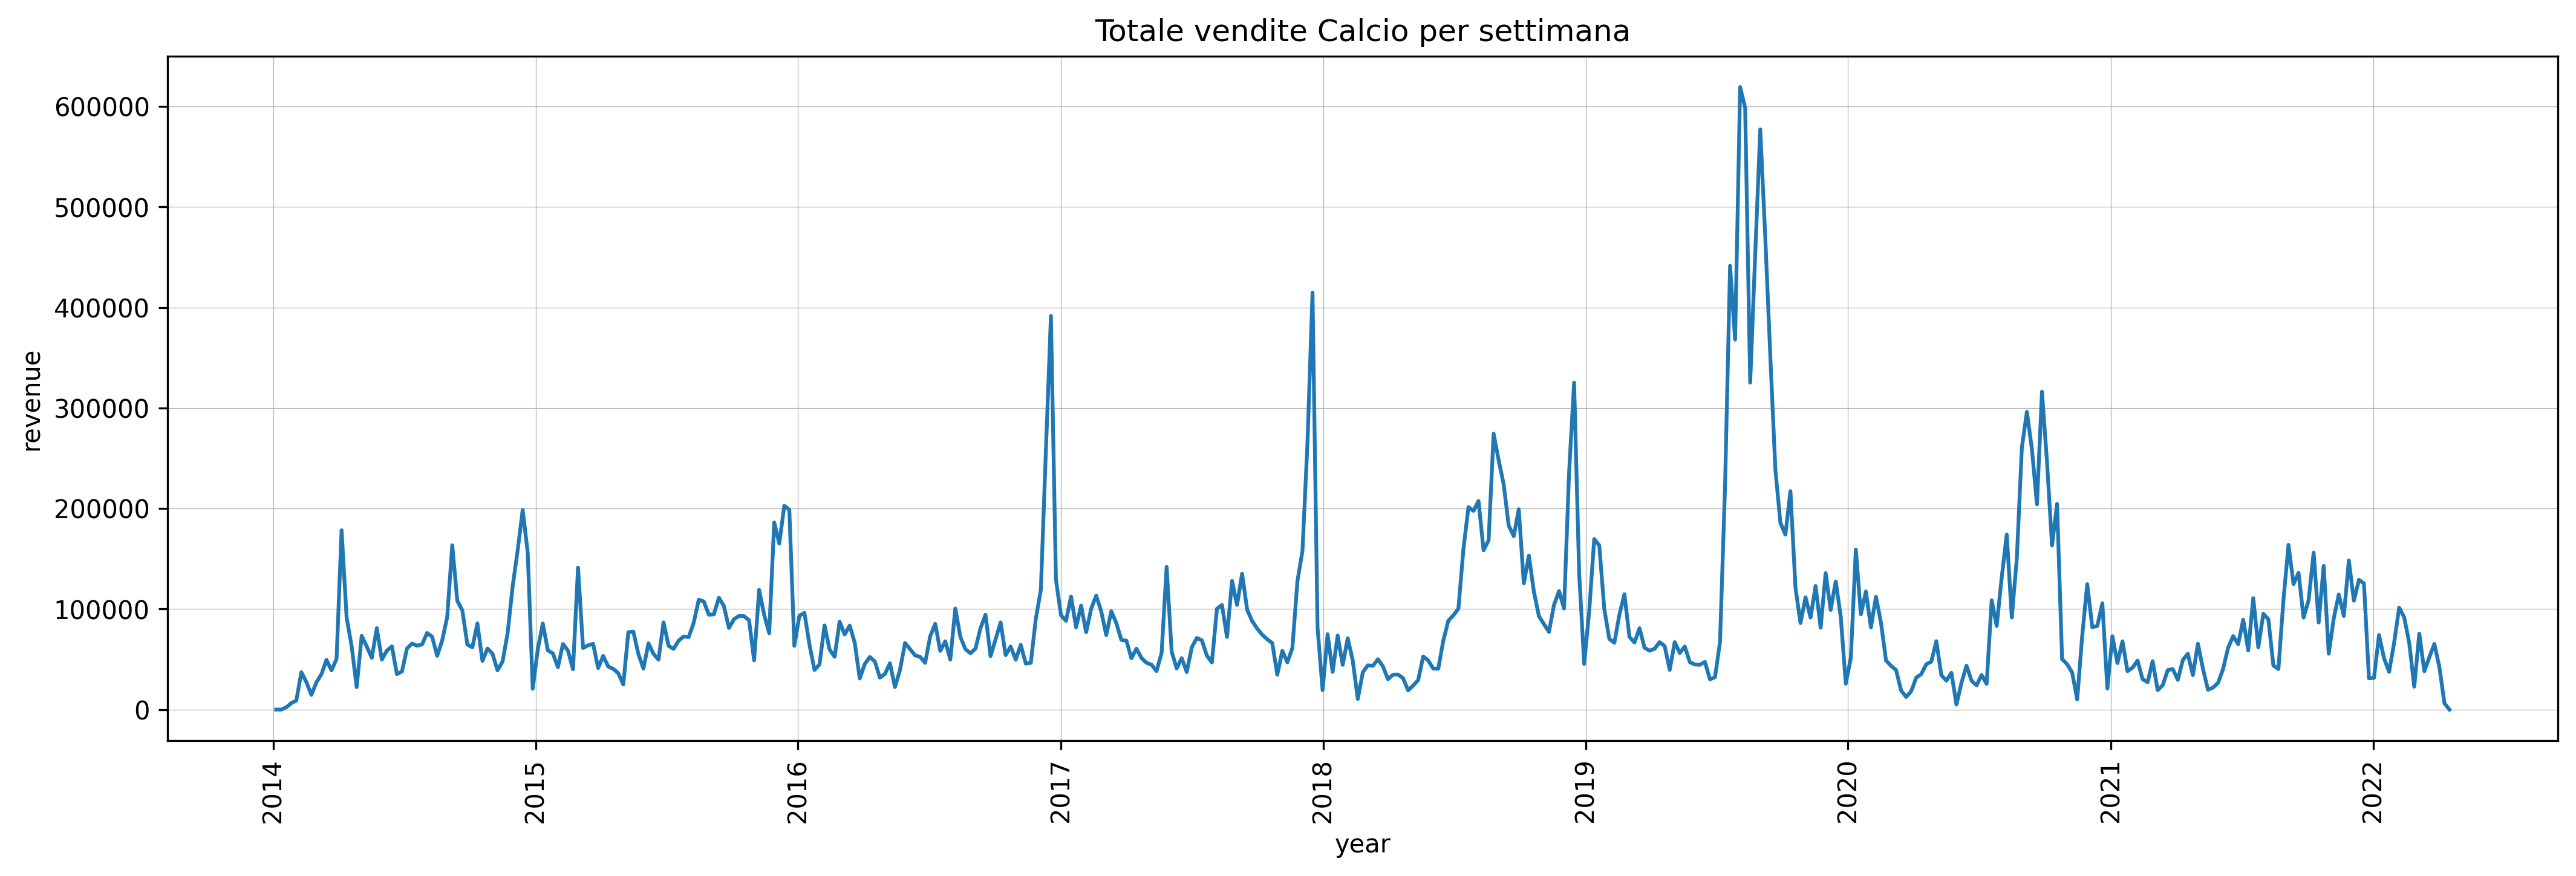

In [10]:
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_calcio, x='year',  y='revenue')
plt.grid(linestyle='-', linewidth=0.3)
plt.title("Totale vendite Calcio per settimana")
ax.tick_params(axis='x', rotation=90)

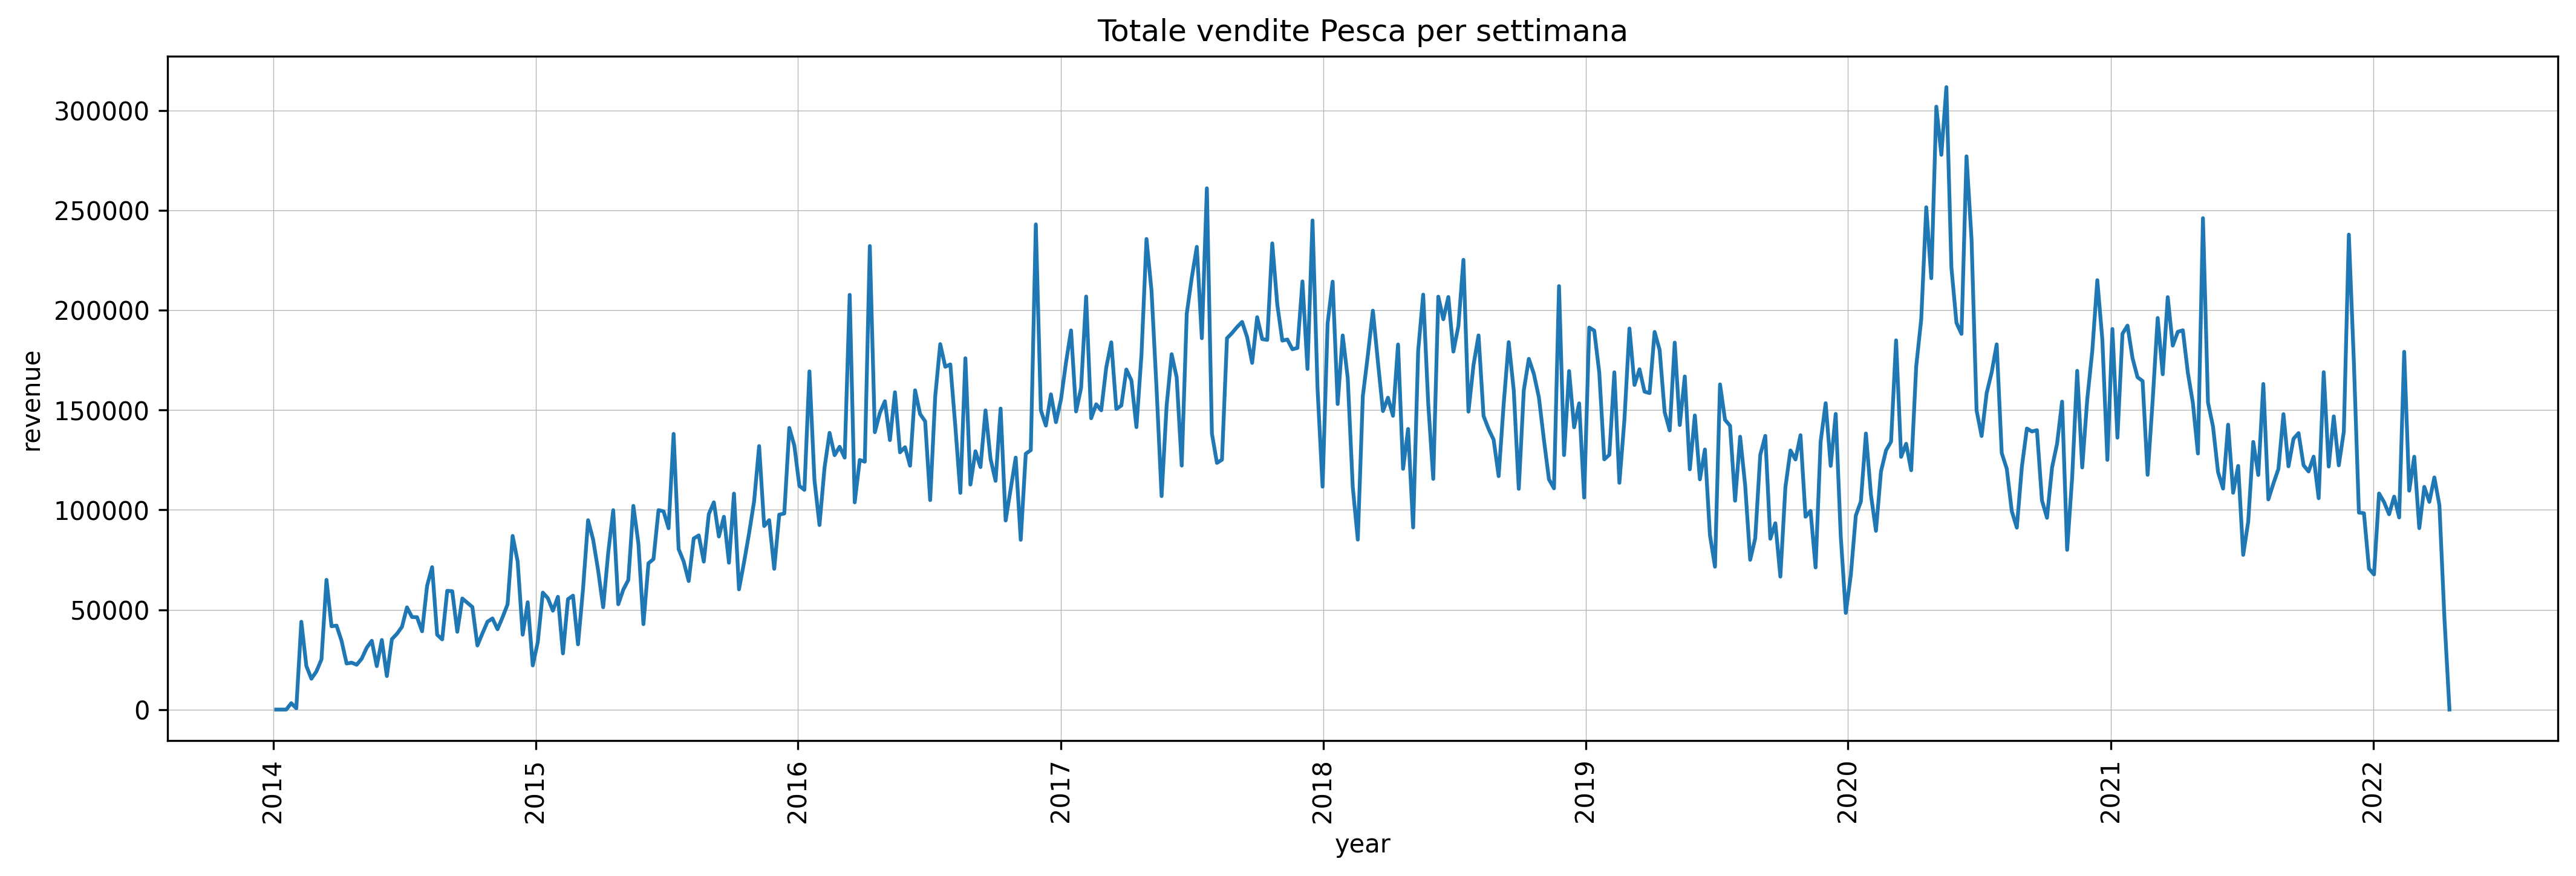

In [11]:
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_pesca, x='year',  y='revenue')
plt.grid(linestyle='-', linewidth=0.3)
plt.title("Totale vendite Pesca per settimana")
ax.tick_params(axis='x', rotation=90)

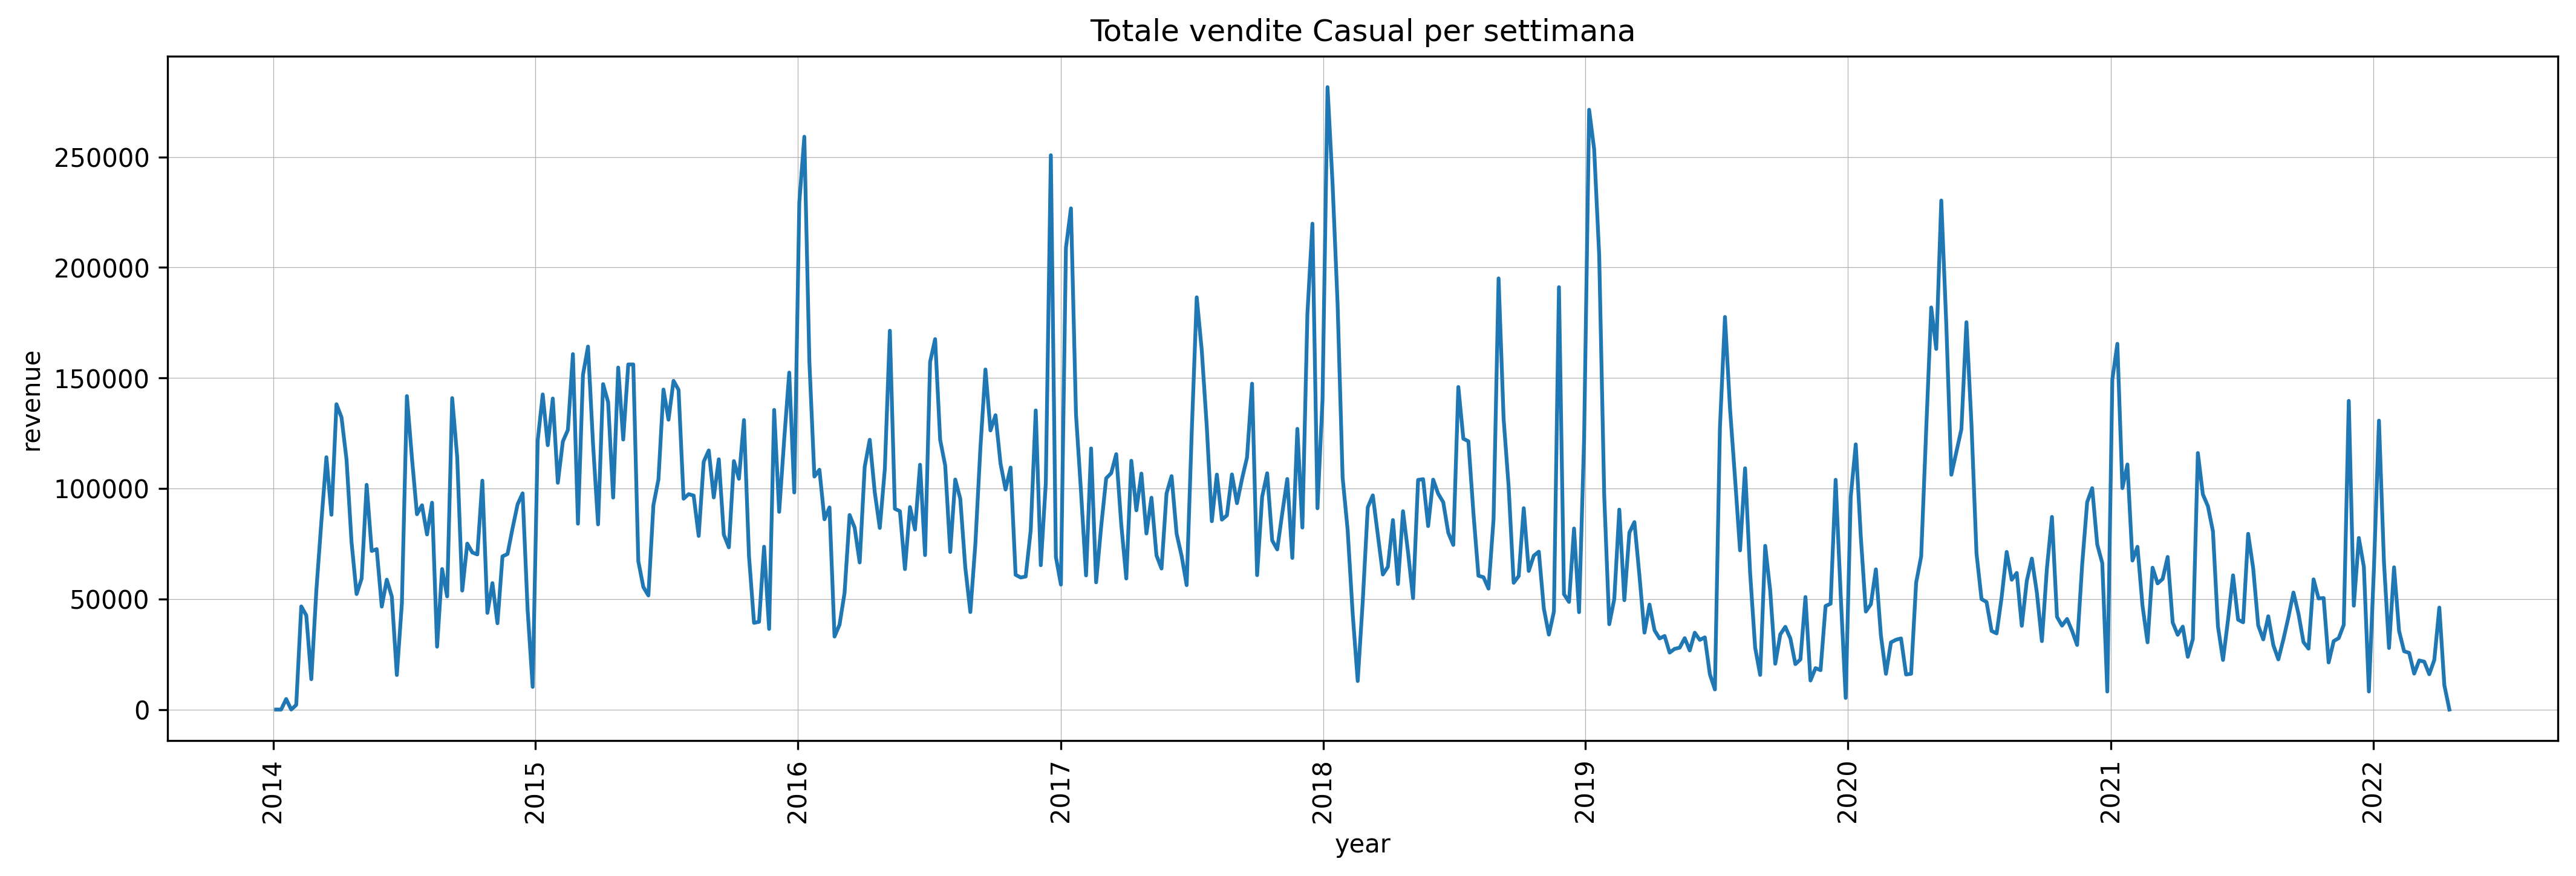

In [12]:
plt.rcParams.update({'figure.figsize': (17, 5), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_casual, x='year',  y='revenue')
plt.title("Totale vendite Casual per settimana")
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [13]:
ds_calcio["totale_periodo_prec"] = ds_calcio["revenue"].shift(+shift_scelto)
ds_pesca["totale_periodo_prec"] = ds_pesca["revenue"].shift(+shift_scelto)
ds_casual["totale_periodo_prec"] = ds_casual["revenue"].shift(+shift_scelto)


ds_calcio= ds_calcio.dropna()  
ds_pesca= ds_pesca.dropna()    
ds_casual= ds_casual.dropna()


print(ds_calcio.shape)
print(ds_pesca.shape)
print(ds_casual.shape)

(381, 4)
(381, 4)
(381, 4)


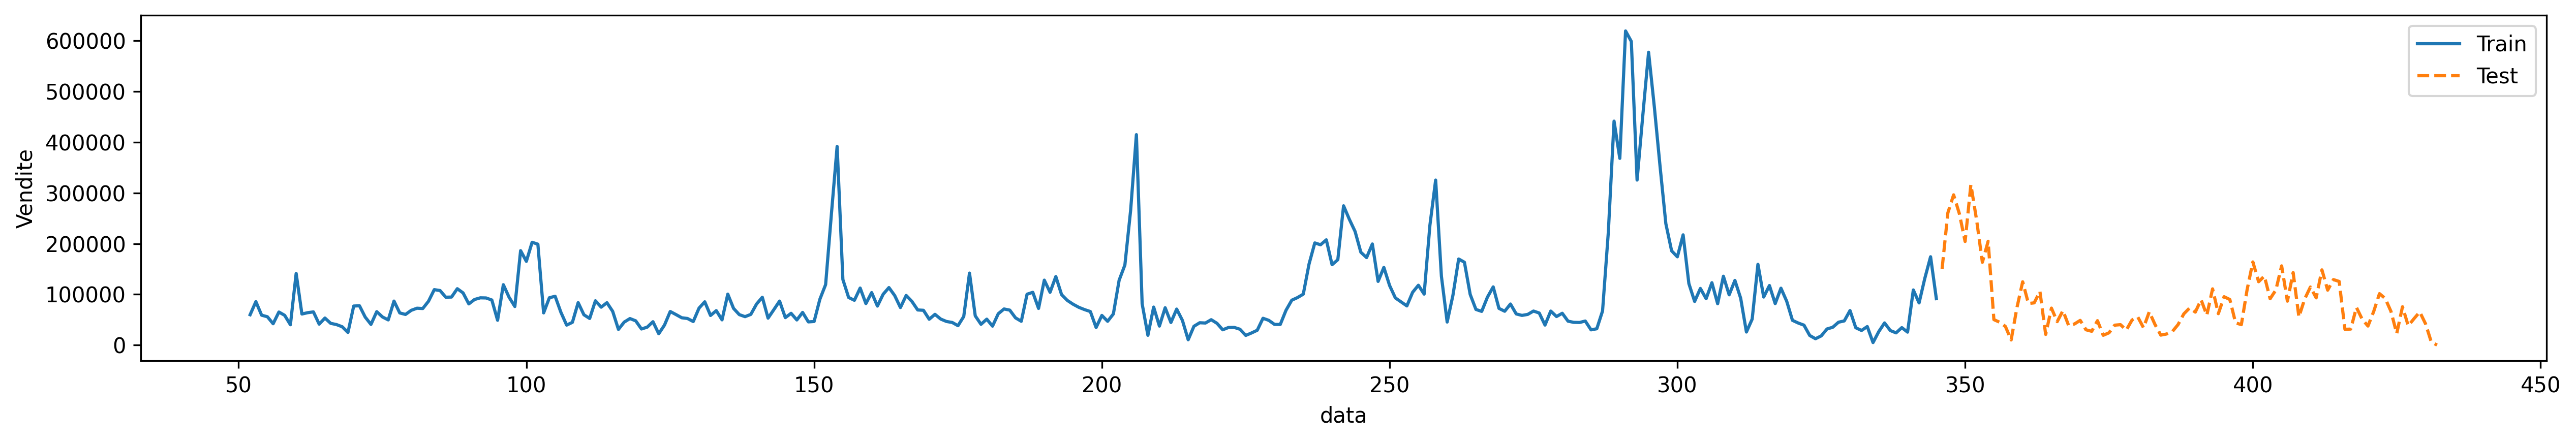

In [14]:
#LIST INPUT, divisione tra parte train e parte dedicata al test
x_calcio = ds_calcio[['totale_periodo_prec']]
x_pesca = ds_pesca[['totale_periodo_prec']]
x_casual = ds_casual[['totale_periodo_prec']]

x_calcio_to_train = x_calcio.iloc[:(len(x_calcio)-porzione_test)]
x_pesca_to_train = x_pesca.iloc[:(len(x_pesca)-porzione_test)]
x_casual_to_train = x_casual.iloc[:(len(x_casual)-porzione_test)]


x_calcio_to_test = x_calcio.iloc[(len(x_calcio)-porzione_test):]
x_pesca_to_test = x_pesca.iloc[(len(x_pesca)-porzione_test):]
x_casual_to_test = x_casual.iloc[(len(x_casual)-porzione_test):]


#LIST OUTPUT, divisione tra parte train e parte dedicata al test
y_calcio = ds_calcio[['revenue']]
y_pesca = ds_pesca[['revenue']]
y_casual = ds_casual[['revenue']]

y_calcio_to_train = y_calcio.iloc[:(len(y_calcio)-porzione_test)]
y_pesca_to_train = y_pesca.iloc[:(len(y_pesca)-porzione_test)]
y_casual_to_train = y_casual.iloc[:(len(y_casual)-porzione_test)]


y_calcio_to_test = y_calcio.iloc[(len(y_calcio)-porzione_test):]
y_pesca_to_test = y_pesca.iloc[(len(y_pesca)-porzione_test):]
y_casual_to_test = y_casual.iloc[(len(y_casual)-porzione_test):]


fig, ax = plt.subplots(figsize=(17, 3))
ax.plot(y_calcio_to_train, ls='-', label='Train')
ax.plot(y_calcio_to_test, ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

In [15]:
estimator_calcio = XGBRegressor(objective='reg:squarederror', n_estimators=220, learning_rate=0.01)
estimator_pesca = XGBRegressor(objective='reg:squarederror', n_estimators=220, learning_rate=0.01)
estimator_casual = XGBRegressor(objective='reg:squarederror', n_estimators=220, learning_rate=0.01)

estimator_calcio.fit(x_calcio_to_train, y_calcio_to_train,
              eval_set=[(x_calcio_to_train, y_calcio_to_train), (x_calcio_to_test, y_calcio_to_test)],
              eval_metric='mae')

estimator_pesca.fit(x_pesca_to_train, y_pesca_to_train,
              eval_set=[(x_pesca_to_train, y_pesca_to_train), (x_pesca_to_test, y_pesca_to_test)],
              eval_metric='mae')

estimator_casual.fit(x_casual_to_train, y_casual_to_train,
              eval_set=[(x_casual_to_train, y_casual_to_train), (x_casual_to_test, y_casual_to_test)],
              eval_metric='mae')

[0]	validation_0-mae:95590.3	validation_1-mae:82734.7
[1]	validation_0-mae:94663.1	validation_1-mae:81686
[2]	validation_0-mae:93744.7	validation_1-mae:80667.4
[3]	validation_0-mae:92835.4	validation_1-mae:79638.9
[4]	validation_0-mae:91934.8	validation_1-mae:78639.9
[5]	validation_0-mae:91043.1	validation_1-mae:77631
[6]	validation_0-mae:90159.9	validation_1-mae:76651.2
[7]	validation_0-mae:89285.5	validation_1-mae:75661.7
[8]	validation_0-mae:88421.7	validation_1-mae:74681.7
[9]	validation_0-mae:87579.3	validation_1-mae:73745.5
[10]	validation_0-mae:86758.3	validation_1-mae:72811
[11]	validation_0-mae:85944.9	validation_1-mae:71913
[12]	validation_0-mae:85139.8	validation_1-mae:71005.9
[13]	validation_0-mae:84342.1	validation_1-mae:70125.1
[14]	validation_0-mae:83552.6	validation_1-mae:69235.4
[15]	validation_0-mae:82770.4	validation_1-mae:68371.5
[16]	validation_0-mae:82002.8	validation_1-mae:67494
[17]	validation_0-mae:81237.2	validation_1-mae:66647.8
[18]	validation_0-mae:80486.1	

XGBRegressor(learning_rate=0.01, n_estimators=220, objective='reg:squarederror')

In [16]:
predictions_calcio = estimator_calcio.predict(x_calcio_to_test)
predictions_pesca = estimator_pesca.predict(x_pesca_to_test)
predictions_casual = estimator_casual.predict(x_casual_to_test)

#ds_calcio_annuale = ds_calcio_annuale.reset_index().drop('index', axis=1)  #non posso usarli perchè me li aggiunge all'inizio del dataset
#ds_calcio_annuale['predictions'] = pd.Series(predictions)

#plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
#fig, ax = plt.subplots()
#sns.lineplot(data=ds_calcio_annuale, x= "year", y='revenue')
#sns.lineplot(data=ds_calcio_annuale, x='year', y='predictions', palette= "red")
#plt.grid(linestyle='-', linewidth=0.3)
#ax.tick_params(axis='x', rotation=90)

In [17]:
calcio_evalutation_ds = ds_calcio[(len(ds_calcio)-porzione_test):]   
calcio_evalutation_ds = calcio_evalutation_ds.reset_index().drop('index', axis=1)
calcio_evalutation_ds['predictions'] = pd.Series(predictions_calcio)
calcio_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,346,2020-08-23,150376.64,453239.95,158080.500000
1,347,2020-08-30,260573.12,577205.05,163677.796875
2,348,2020-09-06,296159.28,469337.25,158080.500000
3,349,2020-09-13,259023.86,351443.62,171422.625000
4,350,2020-09-20,204218.97,239222.78,269865.750000
...,...,...,...,...,...
82,428,2022-03-20,52066.32,39281.77,56375.832031
83,429,2022-03-27,65378.12,40290.70,55412.378906
84,430,2022-04-03,42074.08,29522.05,56375.832031
85,431,2022-04-10,6233.05,49328.86,55613.980469


In [18]:
pesca_evalutation_ds = ds_pesca[(len(ds_pesca)-porzione_test):]  
pesca_evalutation_ds = pesca_evalutation_ds.reset_index().drop('index', axis=1)
pesca_evalutation_ds['predictions'] = pd.Series(predictions_pesca)
pesca_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,346,2020-08-23,91093.20,85771.36,121861.632812
1,347,2020-08-30,121504.08,127480.59,143095.812500
2,348,2020-09-06,140749.52,137066.19,140235.421875
3,349,2020-09-13,139274.26,85557.15,121861.632812
4,350,2020-09-20,139936.02,93325.26,133615.140625
...,...,...,...,...,...
82,428,2022-03-20,104008.46,206575.76,136269.843750
83,429,2022-03-27,116258.41,182268.82,148019.625000
84,430,2022-04-03,102362.06,189201.58,134495.750000
85,431,2022-04-10,45696.29,189956.13,134495.750000


In [19]:
casual_evalutation_ds = ds_casual[(len(ds_casual)-porzione_test):]  
casual_evalutation_ds = casual_evalutation_ds.reset_index().drop('index', axis=1)
casual_evalutation_ds['predictions'] = pd.Series(predictions_casual)
casual_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,346,2020-08-23,61812.67,27988.35,125032.109375
1,347,2020-08-30,37892.71,15665.83,113905.468750
2,348,2020-09-06,58239.32,74081.44,66129.648438
3,349,2020-09-13,68320.25,53645.04,66129.648438
4,350,2020-09-20,52889.65,20726.20,113905.468750
...,...,...,...,...,...
82,428,2022-03-20,15982.93,69056.26,66129.648438
83,429,2022-03-27,22426.12,39354.08,63105.378906
84,430,2022-04-03,46134.57,33818.32,50980.882812
85,431,2022-04-10,10991.32,37512.57,63105.378906


In [20]:
#TROVARE UN VALUTATORE DELLE PERFORMANCE DI FITTING ANALOGO PER L'XGBOOST
#print('Did the model fit?', pd.Series(predictions_calcio).is_fitted) 
#print('AIC', pd.Series(predictions).aic) 
#print(pesca_evalutation_ds.summary())


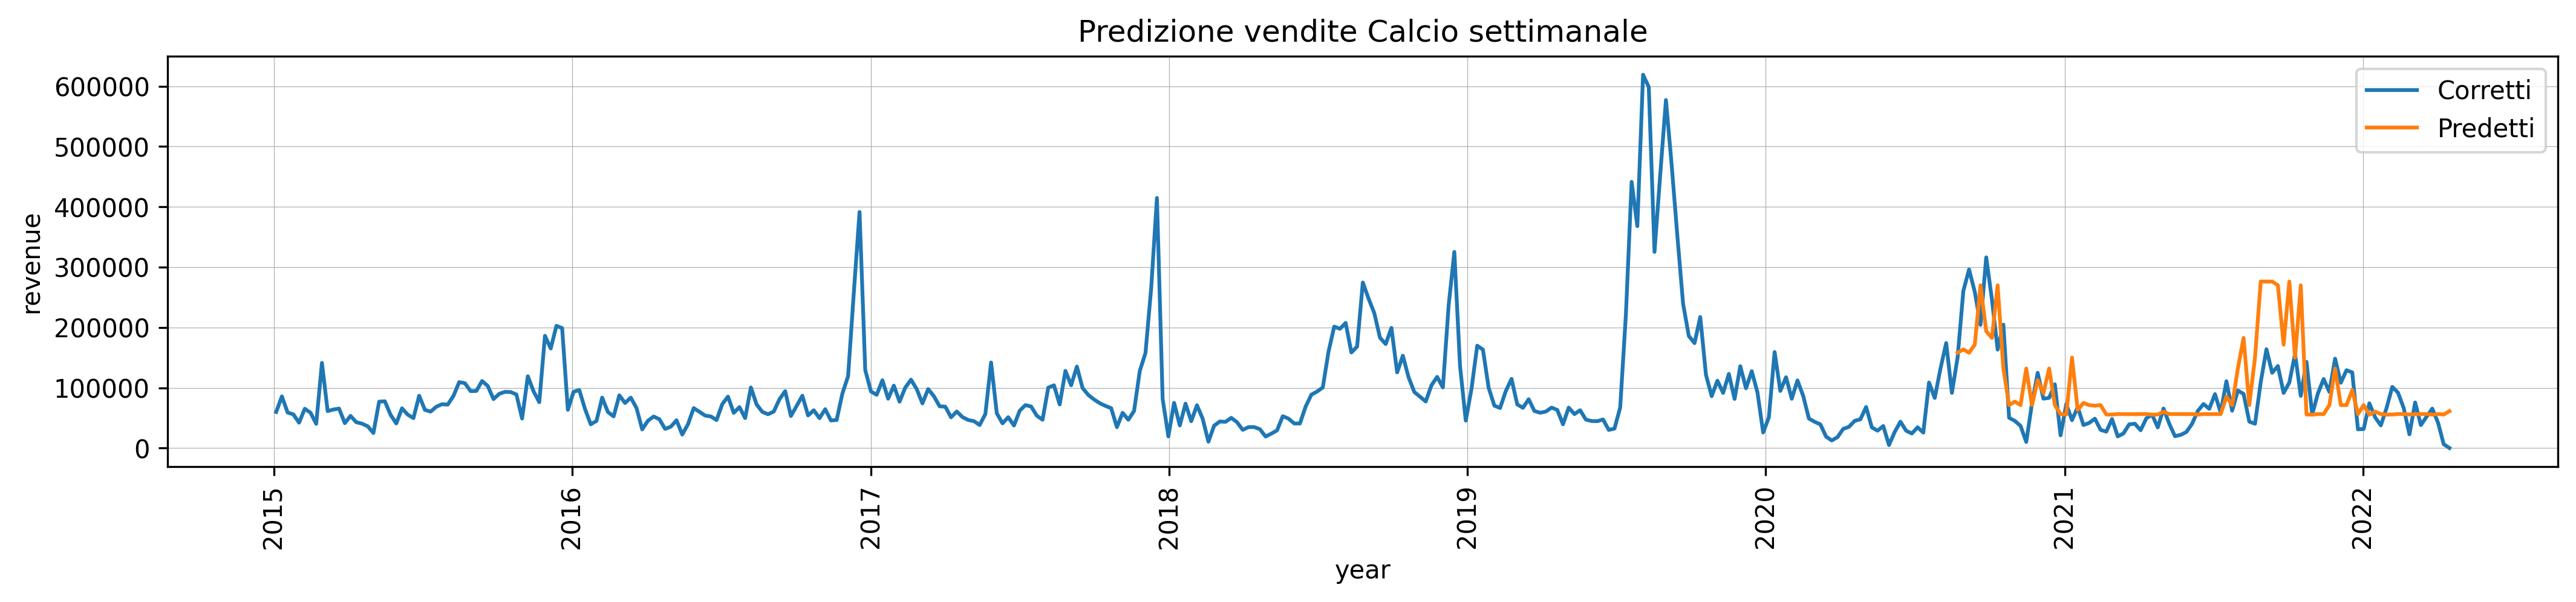

In [21]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_calcio, x= "year", y='revenue', label= "Corretti" )     #_evalutation
sns.lineplot(data=calcio_evalutation_ds, x='year', y='predictions', palette= "red",  label= "Predetti")

#x = calcio_evalutation_ds['year']  
#y = calcio_evalutation_ds['predictions']
#for i,j in zip(x,y):
#  plt.annotate(str(j),xy=(i,j))
#
#y1 = calcio_evalutation_ds['revenue']
#for i,j in zip(x,y1):
#  plt.annotate(str(j),xy=(i,j))
#  calcio_evalutation_ds

plt.title("Predizione vendite Calcio settimanale")

plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

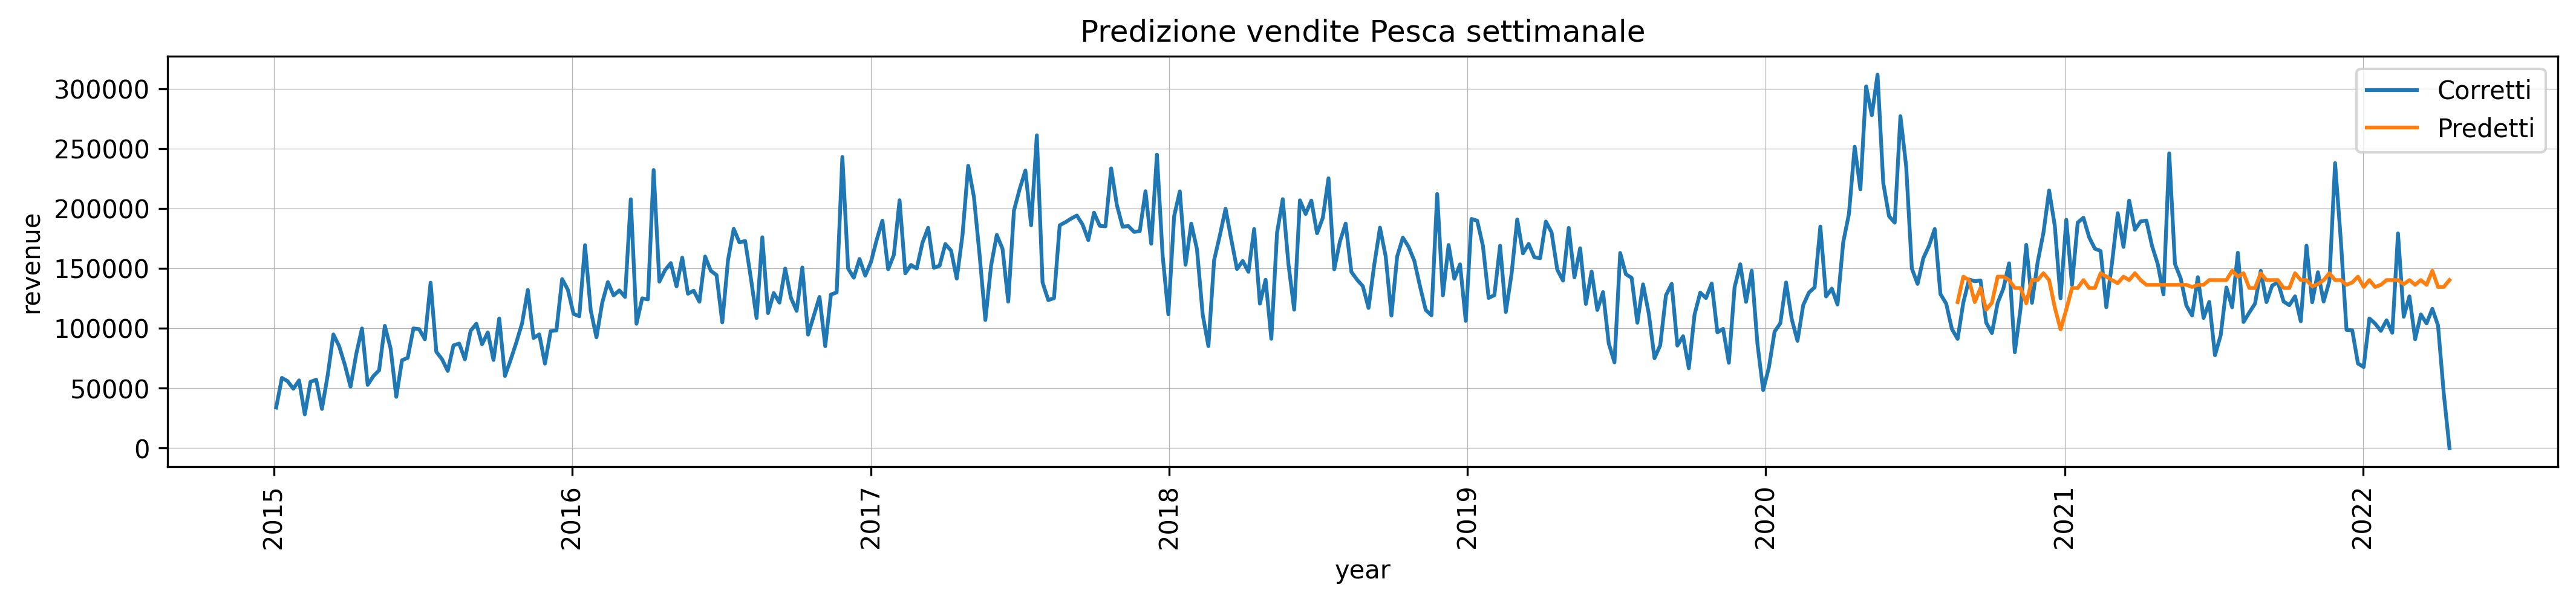

In [22]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_pesca, x= "year", y='revenue', label= "Corretti")     
sns.lineplot(data=pesca_evalutation_ds, x='year', y='predictions', palette= "red", label= "Predetti") 

#x = pesca_evalutation_ds['year']  
#y = pesca_evalutation_ds['predictions']
#for i,j in zip(x,y):
#  plt.annotate(str(j),xy=(i,j))
#
#y1 = pesca_evalutation_ds['revenue']
#for i,j in zip(x,y1):
#  plt.annotate(str(j),xy=(i,j))
#  pesca_evalutation_ds

plt.title("Predizione vendite Pesca settimanale")

plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

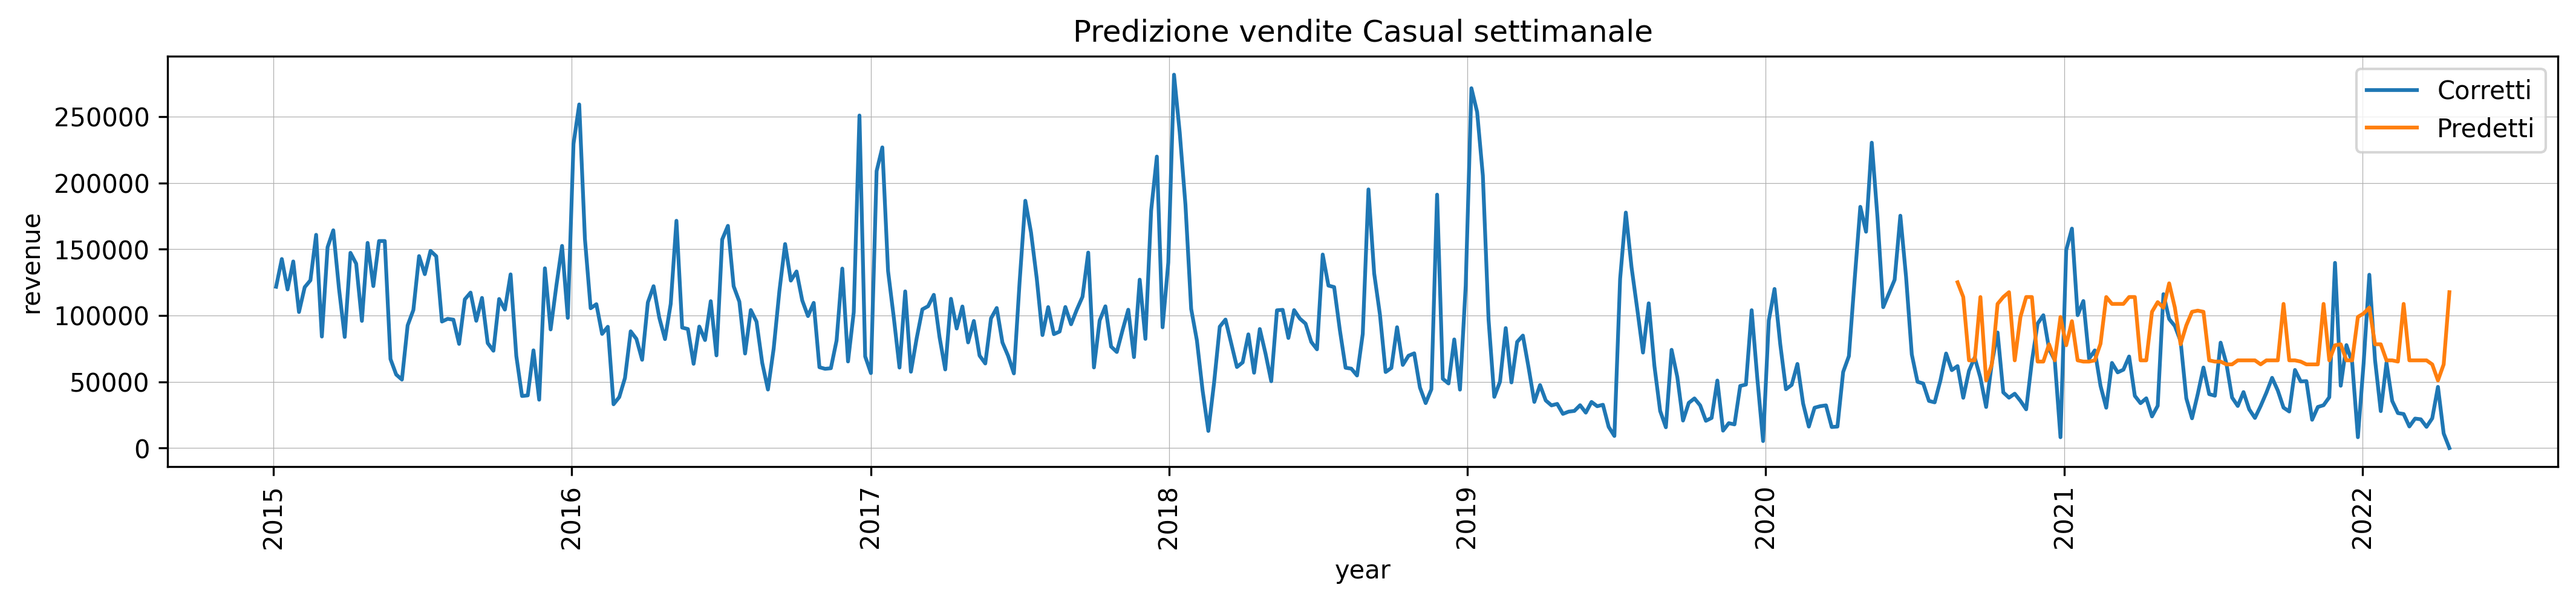

In [23]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=ds_casual, x= "year", y='revenue', label= "Corretti")     
sns.lineplot(data=casual_evalutation_ds, x='year', y='predictions', palette= "red", label= "Predetti") 

#x = casual_evalutation_ds['year']  
#y = casual_evalutation_ds['predictions']
#for i,j in zip(x,y):
#  plt.annotate(str(j),xy=(i,j))
#
#y1 = casual_evalutation_ds['revenue']
#for i,j in zip(x,y1):
#  plt.annotate(str(j),xy=(i,j))
#  casual_evalutation_ds

plt.title("Predizione vendite Casual settimanale")

plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [24]:
calcio_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,346,2020-08-23,150376.64,453239.95,158080.500000
1,347,2020-08-30,260573.12,577205.05,163677.796875
2,348,2020-09-06,296159.28,469337.25,158080.500000
3,349,2020-09-13,259023.86,351443.62,171422.625000
4,350,2020-09-20,204218.97,239222.78,269865.750000
...,...,...,...,...,...
82,428,2022-03-20,52066.32,39281.77,56375.832031
83,429,2022-03-27,65378.12,40290.70,55412.378906
84,430,2022-04-03,42074.08,29522.05,56375.832031
85,431,2022-04-10,6233.05,49328.86,55613.980469


In [25]:
pesca_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,346,2020-08-23,91093.20,85771.36,121861.632812
1,347,2020-08-30,121504.08,127480.59,143095.812500
2,348,2020-09-06,140749.52,137066.19,140235.421875
3,349,2020-09-13,139274.26,85557.15,121861.632812
4,350,2020-09-20,139936.02,93325.26,133615.140625
...,...,...,...,...,...
82,428,2022-03-20,104008.46,206575.76,136269.843750
83,429,2022-03-27,116258.41,182268.82,148019.625000
84,430,2022-04-03,102362.06,189201.58,134495.750000
85,431,2022-04-10,45696.29,189956.13,134495.750000


In [26]:
casual_evalutation_ds

,Unnamed: 0,year,revenue,totale_periodo_prec,predictions
0,346,2020-08-23,61812.67,27988.35,125032.109375
1,347,2020-08-30,37892.71,15665.83,113905.468750
2,348,2020-09-06,58239.32,74081.44,66129.648438
3,349,2020-09-13,68320.25,53645.04,66129.648438
4,350,2020-09-20,52889.65,20726.20,113905.468750
...,...,...,...,...,...
82,428,2022-03-20,15982.93,69056.26,66129.648438
83,429,2022-03-27,22426.12,39354.08,63105.378906
84,430,2022-04-03,46134.57,33818.32,50980.882812
85,431,2022-04-10,10991.32,37512.57,63105.378906


In [27]:
print('Calcio XgBoost Mean Absolute Error (MAE): ', np.mean(np.abs(calcio_evalutation_ds["revenue"] - calcio_evalutation_ds["predictions"])))

Calcio XgBoost Mean Absolute Error (MAE):  44068.168105244265


In [28]:
print('Pesca XgBoost Mean Absolute Error (MAE): ', np.mean(np.abs(pesca_evalutation_ds["revenue"] - pesca_evalutation_ds["predictions"])))

Pesca XgBoost Mean Absolute Error (MAE):  32573.33817887931


In [29]:
print('Casual XgBoost Mean Absolute Error (MAE): ', np.mean(np.abs(casual_evalutation_ds["revenue"] - casual_evalutation_ds["predictions"])))

Casual XgBoost Mean Absolute Error (MAE):  39522.867832255746


In [30]:
MAEoneWeekCalcio = 30931.8993911638
MAEoneWeekPesca = 26354.01727550288
MAEoneWeekCasual = 22230.114937140803

In [31]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [32]:
print('Seasonality error reduction: ', (((np.mean(np.abs(calcio_evalutation_ds["revenue"] - calcio_evalutation_ds["predictions"])))/MAEoneWeekCalcio)-1)*100    )

Seasonality error reduction:  42.46835458747502


In [33]:
print('Seasonality error reduction: ', (((np.mean(np.abs(pesca_evalutation_ds["revenue"] - pesca_evalutation_ds["predictions"])))/MAEoneWeekPesca)-1)*100     )

Seasonality error reduction:  23.59913799236042


In [34]:
print('Seasonality error reduction: ', (((np.mean(np.abs(casual_evalutation_ds["revenue"] - casual_evalutation_ds["predictions"])))/MAEoneWeekCasual)-1)*100     )

Seasonality error reduction:  77.78975927030949


(220 estimator si adatta bene al dataset di calcio ed è un compromesso medio nella predizione anche di Pesca e Casual con shift di 1 mese) 
(Calcio migliore intorno ai 220)
(Pesca migliore intorno ai 280)
(Casual migliore intorno ai 150)



Con shift +1 settimana


* Calcio XgBoost Mean Absolute Error (MAE):  30931.8993911638
* Pesca XgBoost Mean Absolute Error (MAE):  26354.01727550288
* Casual XgBoost Mean Absolute Error (MAE):  22230.114937140803




Con shift +4 settimane

* Calcio XgBoost Mean Absolute Error (MAE):  44166.8021174569
* Pesca XgBoost Mean Absolute Error (MAE):  30685.54026939655
* Casual XgBoost Mean Absolute Error (MAE):  35538.09977370689


* Calcio Seasonality error reduction:  + 42.79 %
* Pesca Seasonality error reduction:  + 16.44 % 
* Casual Seasonality error reduction:  + 59.86 %




Con shift +52 settimane

* Calcio XgBoost Mean Absolute Error (MAE):  44068.168105244265
* Pesca XgBoost Mean Absolute Error (MAE):  32573.33817887931
* Casual XgBoost Mean Absolute Error (MAE):  39522.867832255746


* Calcio Seasonality error reduction:  + 42.47 %
* Pesca Seasonality error reduction:  + 23.60 % 
* Casual Seasonality error reduction:  + 77.79 %